# Reto del Titanic
### Carga de librerías y datos

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.express as px
from sklearn.preprocessing import OneHotEncoder
#import polars as pl

In [40]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")
df = pd.concat([train, test],ignore_index=True)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [41]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Analisis exploratorio y limpieza de datos.

In [42]:
#train.head()
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [43]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Se empezará analizando los valores nulos de los datos

In [44]:
print("Valores nulos Train:\n", df.isnull().sum())

Valores nulos Train:
 PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64


In [45]:
print("Valores nulos Test\n", test.isnull().sum())

Valores nulos Test
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


Se puede apreciar que los datos con mayor cantidad de valores nulos son la edad (Age) y la cabina (Cabin). 

Debido a que los valores de cabina son los que mayor cantidad de nulos tienen y sería más difícil *rellenar*, por lo que se decidió retirar dichos datos.

También se retiraron los identificadores (Passenger ID) ya que son variables independientes que solamente llevan el registro de la base de datos.

In [46]:
train = train.drop(["Cabin","PassengerId"],axis=1)
test = test.drop(["Cabin","PassengerId"],axis=1)
df = df.drop(["Cabin", "PassengerId"],axis=1)

A partir de ahora solo se tomarán en cuenta los datos de entrenamiento, puesto que si se tienen que realizar adecuaciones en los de prueba se podrán realizar más adelante.

In [47]:
train.head(20)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C


In [48]:
df.isnull().sum()

Survived    418
Pclass        0
Name          0
Sex           0
Age         263
SibSp         0
Parch         0
Ticket        0
Fare          1
Embarked      2
dtype: int64

Se puede notar que hay 2 datos faltantes en el puerto de embarcamiento (Embarked), por lo que se tiene que pensar en qué es lo que se puede hacer para poder *completarlos*. 

Observando una gráfica de éstos valores:

In [49]:
"""
plt.figure(figsize=(6, 7))
sns.countplot(x='Embarked', data=train)
"""
fig=px.histogram(df, x="Embarked")#, color="Sex"
fig.show()

Se puede notar que la moda de esta variable categórica es la S, por lo que a los valores nulos les daremos dicho valor para mantener la coherencia de los datos.

https://nicolasurrego.medium.com/tratamiento-de-valores-vac%C3%ADos-ii-estrategias-de-imputaci%C3%B3n-estad%C3%ADstica-moda-mediana-y-media-2665b0f53a4c

In [50]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df['Fare'] = df['Fare'].fillna(df['Fare'].mode()[0])

Ahora regresamos a la variable de edad, donde tendremos que resolver los 263 datos faltantes que presenta.

Se volverá a realizar una gráfica, de forma que se decida cuál es la mejor forma de sustituir los datos faltantes.

In [51]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1309.000000
mean,0.383838,2.294882,29.881138,0.498854,0.385027,33.276193
std,0.486592,0.837836,14.413493,1.041658,0.865560,51.743584
min,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [52]:
df['Age'].median()

28.0

In [53]:
df['Age'].mode()

0    24.0
Name: Age, dtype: float64

In [54]:
#px.histogram(df, x="Age", color="Survived")
px.histogram(df, x="Age")

<Axes: xlabel='Age', ylabel='Count'>

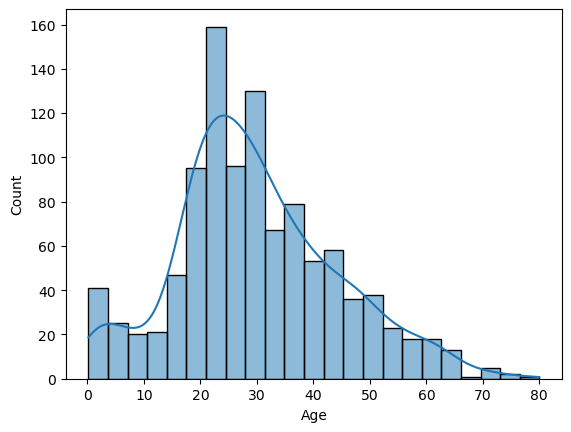

In [55]:
sb.histplot(df['Age'], kde=True)

Se consideró probar la mediana o la media móvil para llenar los vacíos, sin embargo, se pude utilizar otro dato para poder aproximar la edad de una mejor manera.

Se pretende hacer uso de los títulos de las personas para darles una medida, es decir, si una persona tiene el título Mr y no tiene edad, se usará la media móvil de las personas con ese título.

A continuación se procede a hacer la obtención del título para posteriormente realizar lo mencionado anteriormente.

In [56]:
df['Title'] = df['Name'].str.extract(r',\s*([^\.]*)\.', expand=False)
df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer', 'Dona'], dtype=object)

Para decidir qué medida se utilizará, se realizará una visualización de histogramas de las edades de los 17 títulos para decidir si usar media o mediana. Considerando también que la media móvil deberá mantenerse como entero.

In [57]:
# Contar las edades faltantes por título
edades_faltantes = df[df['Age'].isnull()].groupby('Title').size().reset_index(name='Missing Count')

fig = px.bar(edades_faltantes, x='Title', y='Missing Count', 
             title='Número de Edades Faltantes por Título', 
             labels={'Title': 'Título', 'Missing Count': 'Cantidad de Edades Faltantes'},
             text_auto=True)

# Mostrar el gráfico
fig.show()

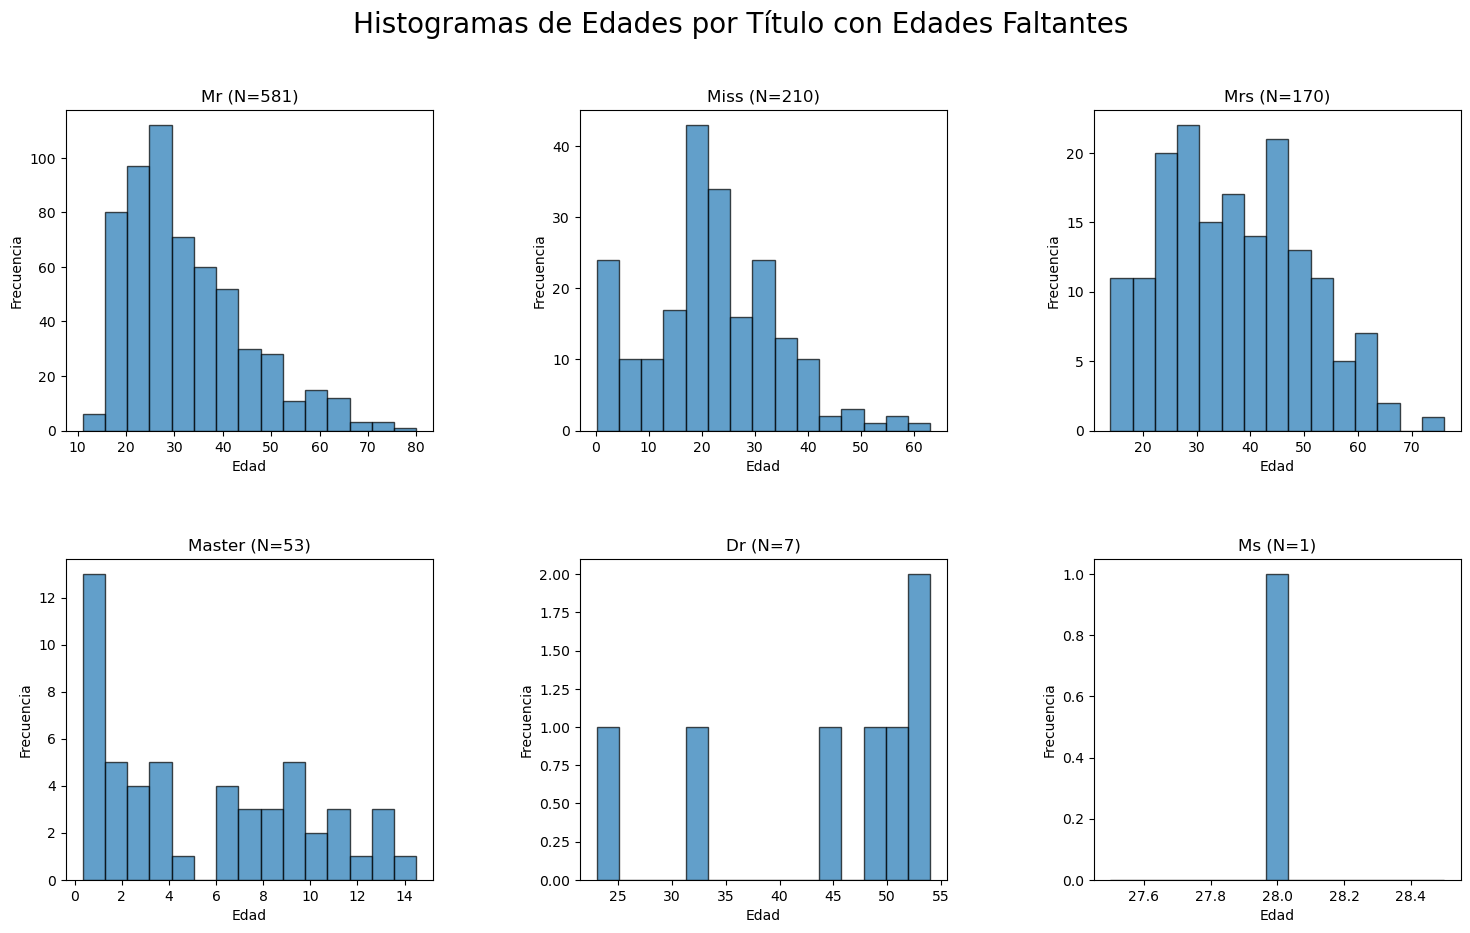

In [58]:
# Títulos con valores faltantes
titulos_con_faltantes = ['Mr', 'Miss', 'Mrs', 'Master', 'Dr', 'Ms']

plt.figure(figsize=(18, 10))
plt.subplots_adjust(hspace=0.4, wspace=0.4)

# Histogramas
for i, titulo in enumerate(titulos_con_faltantes):
    plt.subplot(2, 3, i+1) 
    subset = df[(df['Title'] == titulo) & (df['Age'].notnull())]['Age']  # Filtrar las edades no nulas
    plt.hist(subset, bins=15, edgecolor='black', alpha=0.7)  # Histograma
    plt.title(f'{titulo} (N={len(subset)})')  # Título del subplot con la cantidad de datos
    plt.xlabel('Edad')
    plt.ylabel('Frecuencia')

# Título general del gráfico
plt.suptitle('Histogramas de Edades por Título con Edades Faltantes', fontsize=20)
plt.show()

En todos los títulos en los que hay edades faltantes, los datos no siguen una distribución normal, por lo que el uso de la media podría implicar la creación de datos sesgados. 

Se procederá a hacer el llenado de los datos vacíos haciendo uso de la mediana, puesto que esta medida permitirá que los valores atípicos no sesguen las medidas. Sin embargo, el uso de esta medida se realizará solo en los títulos: Mr, Miss y Mrs, dado que cuentan conn datos suficientes. Para los títulos: Master y Dr se usará una media móvil que se mantenga como un número entero.

In [59]:
# Llenar NaN con la mediana móvil para los títulos Mr, Miss, Mrs
df.loc[df['Title'].isin(['Mr', 'Miss', 'Mrs']), 'Age'] = (
    # Usamos loc para seleccionar filas donde el 'Title' es uno de los indicados (Mr, Miss, Mrs)
    df.groupby('Title')['Age'].transform(  # Agrupamos por 'Title' y aplicamos transform para modificar 'Age'
        lambda x: x.fillna(x.rolling(window=3, min_periods=1).median())  # Usamos lambda para llenar valores nulos con la mediana móvil (ventana de 3)
    )
)

# Llenar NaN con la media móvil para los títulos Master y Dr
df.loc[df['Title'].isin(['Master', 'Dr']), 'Age'] = (
    # Usamos loc para seleccionar filas donde el 'Title' es Master o Dr
    df.groupby('Title')['Age'].transform(  # Agrupamos por 'Title' y aplicamos transform para modificar 'Age'
        lambda x: x.fillna(x.rolling(window=3, min_periods=1).mean())  # Llenamos NaN con la media móvil (ventana de 3)
    )
)

df['Age'] = df['Age'].fillna(df['Age'].mode()[0]) #Llenar la moda de las edades faltantes


In [60]:
df.isnull().sum()

Survived    418
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Embarked      0
Title         0
dtype: int64

In [61]:
px.histogram(df, x="Age")

Ahora que se han completado los datos, se procederá a eliminar los datos que se consideren que no aporten a la predicción.

Convertimos en una variable binaria el sexo, para poder utilizar este dato. Male tiene el valor 0 y Female 1.

In [62]:
df['Sex'].replace(['male', 'female'],
                        [0, 1], inplace=True)

C:\Users\aoran\AppData\Local\Temp\ipykernel_21092\751189688.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\aoran\AppData\Local\Temp\ipykernel_21092\751189688.py:1: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



A continuación se generan nuevas variables que indicarán relaciones existentes entre familias

In [63]:
df['# relatives'] = df['SibSp'] + df['Parch'] #Número total de familiares en el barco


A continuación se realizará una tabla de correlación, por lo que se hará que las variables categóricas pasen a ser variables numéricas que puedan ser utilizadas. Además se hará la eliminación de las variables "Name" y Ticket", puesto que son muy variantes los valores de estos.

In [64]:
df=df.drop(columns=['Name','Ticket','Title'])

In [76]:
# Suponiendo que `df` es tu DataFrame y que tienes las columnas categóricas 'Embarked' y 'Pclass'
categorical_columns = ['Embarked', 'Pclass']

# Extraer los datos de las columnas categóricas
categorical_data = df[categorical_columns]

# Inicializar el OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# Aplicar one-hot encoding a las columnas categóricas
one_hot_encoded = encoder.fit_transform(categorical_data)

# Crear un DataFrame con las columnas one-hot encoded
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns))

# Concatenar el DataFrame original con el DataFrame one-hot encoded
df_encoded = pd.concat([df, one_hot_df], axis=1)

# Eliminar las columnas categóricas originales
df = df_encoded.drop(categorical_columns, axis=1)

# Mostrar el DataFrame resultante
print(f"Encoded Employee data : \n{df}")


Encoded Employee data : 
      Survived  Sex   Age  SibSp  Parch      Fare  # relatives  Embarked_C  \
0          0.0    0  22.0      1      0    7.2500            1         0.0   
1          1.0    1  38.0      1      0   71.2833            1         1.0   
2          1.0    1  26.0      0      0    7.9250            0         0.0   
3          1.0    1  35.0      1      0   53.1000            1         0.0   
4          0.0    0  35.0      0      0    8.0500            0         0.0   
...        ...  ...   ...    ...    ...       ...          ...         ...   
1304       NaN    0  36.5      0      0    8.0500            0         0.0   
1305       NaN    1  39.0      0      0  108.9000            0         1.0   
1306       NaN    0  38.5      0      0    7.2500            0         0.0   
1307       NaN    0  38.5      0      0    8.0500            0         0.0   
1308       NaN    0   9.5      1      1   22.3583            2         1.0   

      Embarked_Q  Embarked_S  Pclass_1

             Survived       Sex       Age     SibSp     Parch      Fare  \
Survived     1.000000  0.543351 -0.078835 -0.035322  0.081629  0.257307   
Sex          0.543351  1.000000 -0.077144  0.109609  0.213125  0.185744   
Age         -0.078835 -0.077144  1.000000 -0.216285 -0.137664  0.166211   
SibSp       -0.035322  0.109609 -0.216285  1.000000  0.373587  0.160388   
Parch        0.081629  0.213125 -0.137664  0.373587  1.000000  0.221668   
Fare         0.257307  0.185744  0.166211  0.160388  0.221668  1.000000   
# relatives  0.016639  0.188583 -0.217506  0.861952  0.792296  0.226653   
Embarked_C   0.168240  0.066564  0.085495 -0.048396 -0.008635  0.286405   
Embarked_Q   0.003650  0.088651 -0.044907 -0.048678 -0.100943 -0.129922   
Embarked_S  -0.149683 -0.115193 -0.046885  0.073709  0.071881 -0.170123   
Pclass_1     0.285904  0.107371  0.358108 -0.034256 -0.013033  0.600115   
Pclass_2     0.093349  0.028862 -0.001750 -0.052419 -0.010057 -0.121168   
Pclass_3    -0.322308 -0.

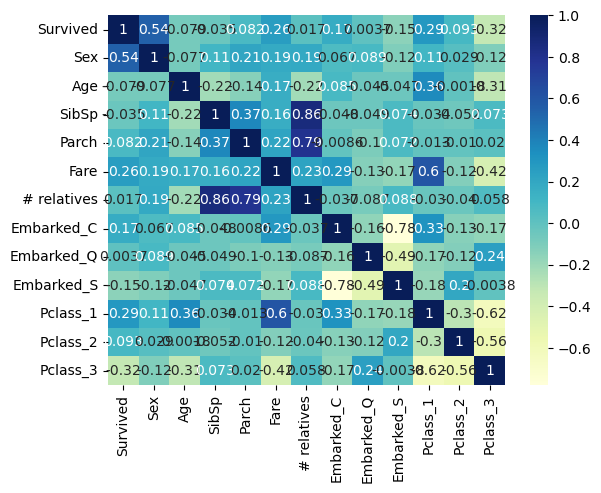

In [77]:

print(df.corr()) 
  
# plotting correlation heatmap 
dataplot = sb.heatmap(df.corr(), cmap="YlGnBu", annot=True) 
  


Considerando la información recopilada en nuestra investigación y la correlación encontrada entre las diferentes variables con supervivencia, decidimos hacer uso de las variables Pclass, Sex y Age. Esta fue una elección definitiva, sin embargo, con varias variables que se mantenían en duda. Ante este problema se encontró una función que permite encontrar las mejores features, este es Sequential Feature Selector.

In [35]:
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.model_selection  import train_test_split
from sklearn.linear_model import LinearRegression


X=dftrain.drop(columns=['Survived']) #Se elimina la que se va a predecir
y=dftrain['Survived'] #Se elimina la predictora
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.2,
random_state=42)

linearreg = LinearRegression()
forwad = SequentialFeatureSelector(
linearreg, #Modelo de Regresión
k_features=7, #Features que tendremos
forward=True,#Forward Selection o Backward Elimination
verbose=2, #
scoring="neg_mean_squared_error"
)
sf = forwad.fit(X,y)

c:\Users\aoran\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning:

`fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.

c:\Users\aoran\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning:

`fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.

c:\Users\aoran\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning:

`fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.

c:\Users\aoran\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning:

`fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.

c:\Users\aoran\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning:

`fit_params` is deprecated and will be removed in version 1.6. Pass parameters via

In [36]:
feat_names = list(sf.k_feature_names_)
print(feat_names)


['Pclass', 'Sex', 'Age', 'Fare', '# relatives', 'Embarked_C', 'Embarked_S']


Encontramos que los 5 features más relevantes son 'Pclass', 'Sex', 'Age', 'Embarked', '# relatives', con esto confirmamos los 3 features que habíamos decidido. Y además agregamos 2 features que habíamos tenido contempladas como un ¨Tal vez¨. por lo que se procedió con la eliminación del resto de features innecesarias y posteriormente con el guardado de este

In [38]:
df_encoded

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,# relatives,Embarked_C,Embarked_Q,Embarked_S
0,0.0,3,0,22.0,1,0,7.2500,1,0.0,0.0,1.0
1,1.0,1,1,38.0,1,0,71.2833,1,1.0,0.0,0.0
2,1.0,3,1,26.0,0,0,7.9250,0,0.0,0.0,1.0
3,1.0,1,1,35.0,1,0,53.1000,1,0.0,0.0,1.0
4,0.0,3,0,35.0,0,0,8.0500,0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
1304,NaN,3,0,36.5,0,0,8.0500,0,0.0,0.0,1.0
1305,NaN,1,1,39.0,0,0,108.9000,0,1.0,0.0,0.0
1306,NaN,3,0,38.5,0,0,7.2500,0,0.0,0.0,1.0
1307,NaN,3,0,38.5,0,0,8.0500,0,0.0,0.0,1.0


In [39]:
df=df.drop(columns=["SibSp","Parch","Fare"])

In [34]:
#df.to_csv("Titanic_train_test")
#dftrain=df_encoded.iloc[:891]
#dftest=df_encoded.iloc[891:]
# Cuando realicemos la separaci'on de los datasets